# Sentiment Indexes

In [1]:
from tqdm import tqdm_notebook
import pickle

import numpy as np
import pandas as pd
import datetime

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

%matplotlib inline

# Creating a sentiment index

In [2]:
dff_big = pd.read_csv('../03.sentiment_analysis/vk_post_sentiment.tsv', sep='\t')
print(dff_big.shape)
dff_big.head()

(1061703, 15)


,post_id,likes,reposts,comments,text,date,url,title,text_tagged,title_tagged,source,rusent_cnt,rusent_pos,rusent_neg,rusent_ano
0,114353,1,0,0,Скончался диктор Центрального телевидения Евге...,2019-02-02,https://www.interfax.ru/russia/648850,Скончался диктор Центрального телевидения Евге...,скончаться_VERB диктор_NOUN центральный_ADJ те...,скончаться_VERB диктор_NOUN центральный_ADJ те...,interfax_vk_posts,NaN,NaN,NaN,NaN
1,114352,0,0,0,Троим подозреваемым в причастности к теракту в...,2019-02-02,https://www.interfax.ru/world/648849,Троим подозреваемым в причастности к теракту в...,трое_NUM подозреваемый_NOUN в_ADP причастность...,трое_NUM подозреваемый_NOUN в_ADP причастность...,interfax_vk_posts,NaN,NaN,NaN,NaN
2,114351,0,0,0,Троим подозреваемым в причастности к теракту в...,2019-02-02,https://www.interfax.ru/world/648849,Троим подозреваемым в причастности к теракту в...,трое_NUM подозреваемый_NOUN в_ADP причастность...,трое_NUM подозреваемый_NOUN в_ADP причастность...,interfax_vk_posts,NaN,NaN,NaN,NaN
3,114350,0,0,0,Минэнерго США запретит своим ученым участвоват...,2019-02-02,https://www.interfax.ru/world/648847,Минэнерго США запретит своим ученым участвоват...,минэнерго_NOUN сша_NOUN запрещать_VERB свой_DE...,минэнерго_NOUN сша_NOUN запрещать_VERB свой_DE...,interfax_vk_posts,2.0,1.0,0.0,1.0
4,114349,2,1,0,Минэнерго США запретило своим ученым участвова...,2019-02-02,https://www.interfax.ru/world/648847,Минэнерго США запретило своим ученым участвова...,минэнерго_NOUN сша_NOUN запрещать_VERB свой_DE...,минэнерго_NOUN сша_NOUN запрещать_VERB свой_DE...,interfax_vk_posts,NaN,NaN,NaN,NaN


In [3]:
dff_big.date.apply(lambda w: w.split('-')[0]).value_counts()

2018    256640
2019    247763
2017    165912
2016    115405
2020    103239
2015     82890
2014     52285
2013     22531
2012     15038
Name: date, dtype: int64

In [4]:
# dff_big = dff_big[dff_big.date.apply(lambda w: w[:4]) >= '2014']

In [5]:
dff_big.source.value_counts()

rg_vk_posts           180270
komersant_vk_posts    155180
tass_vk_posts         133283
rt_vk_posts           119446
lenta_vk_posts        117137
rbc_vk_posts           64172
ria_vk_posts           63253
interfax_vk_posts      62583
vedomosty_vk_posts     59033
meduza_vk_posts        56865
lentach_1_vk_posts     30351
lentach_2_vk_posts     20130
Name: source, dtype: int64

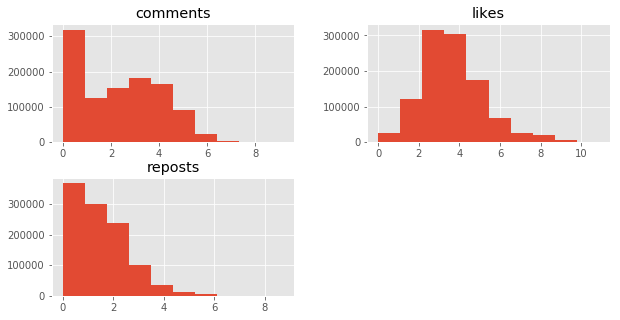

In [6]:
dff_big[['comments', 'likes', 'reposts']].apply(lambda w: np.log(w + 1)).hist(figsize=(10,5));

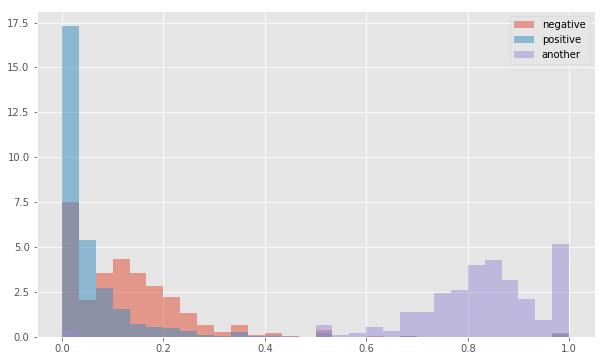

In [7]:
plt.figure(figsize=(10,6))
(dff_big.rusent_neg/dff_big.rusent_cnt).hist(alpha=0.5, label="negative", density=True, bins=30)
(dff_big.rusent_pos/dff_big.rusent_cnt).hist(alpha=0.5, label="positive", density=True, bins=30)
(dff_big.rusent_ano/dff_big.rusent_cnt).hist(alpha=0.5, label="another", density=True, bins=30)
plt.legend();

In [8]:
dff_agg = dff_big.groupby('source')[['rusent_neg','rusent_pos', 'rusent_ano', 
                                     'rusent_cnt']].agg(['mean', 'median'])
dff_agg

rusent_neg        rusent_pos         rusent_ano         \
                         mean median       mean median        mean median   
source                                                                      
interfax_vk_posts    2.139440    1.0   0.617524    0.0   10.890524    4.0   
komersant_vk_posts   2.000048    1.0   0.539272    0.0   11.112255    5.0   
lenta_vk_posts       4.773271    3.0   1.489386    1.0   26.950902   18.0   
lentach_1_vk_posts  28.836592   17.0   8.274949    6.0  169.823965  124.0   
lentach_2_vk_posts   7.702360    3.0   2.481235    1.0   49.686426   21.0   
meduza_vk_posts      7.896993    5.0   2.131371    1.0   48.459880   34.0   
rbc_vk_posts        16.557837    8.0   3.580139    2.0   94.863206   55.0   
rg_vk_posts          1.405266    0.0   0.504927    0.0    8.851562    5.0   
ria_vk_posts        17.398473   11.0   6.374978    4.0   97.249206   71.0   
rt_vk_posts         10.635034    7.0   2.791750    2.0   64.470027   47.0   
tass_vk_posts        2.355010    1.0   0.923953    0.0   13.597345    8.0   
vedomosty_vk_posts   2.566827    1.0   0.602819    0.0   14.203392    8.0   

                    rusent_cnt         
                          mean median  
source                                 
interfax_vk_posts    13.574099    5.0  
komersant_vk_posts   13.593939    6.0  
lenta_vk_posts       33.168315   22.0  
lentach_1_vk_posts  206.928955  149.0  
lentach_2_vk_posts   59.826978   26.0  
meduza_vk_posts      58.455273   41.0  
rbc_vk_posts        114.999327   67.0  
rg_vk_posts          10.740345    6.0  
ria_vk_posts        121.016048   88.0  
rt_vk_posts          77.896674   57.0  
tass_vk_posts        16.872526   10.0  
vedomosty_vk_posts   17.373038   10.0

In [9]:
100*dff_big.isnull().sum()/dff_big.shape[0]

post_id          0.000000
likes            0.000000
reposts          0.000000
comments         0.000000
text             9.025876
date             0.000000
url             54.426238
title           54.599168
text_tagged      9.202008
title_tagged    54.657564
source           0.000000
rusent_cnt      23.976762
rusent_pos      23.976762
rusent_neg      23.976762
rusent_ano      23.976762
dtype: float64

In [10]:
# texts
dff_big['full_text'] = dff_big.fillna('').title_tagged + ' ' + dff_big.fillna('').text_tagged 

# drop tags
dff_big['full_text'] = dff_big.full_text.apply(lambda w: ' '.join([item.split("_")[0] for item in w.split(" ")]))

# drop extra columns
dff_big.drop(['text', 'title', 'text_tagged', 'title_tagged'], axis=1, inplace=True)

In [11]:
q = dff_big.full_text.apply(len).quantile(0.99)
print(q)

dff_big = dff_big[(dff_big.full_text.apply(len) < q) & (dff_big.full_text.apply(len) > 1)]

dff_big.dropna(subset=['rusent_cnt'], inplace=True)
dff_big.shape

557.0


(770354, 12)

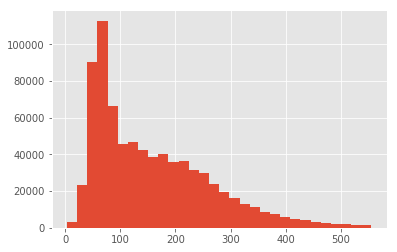

In [12]:
dff_big.full_text.apply(len).hist(bins=30);

In [13]:
def intervals(u, d):
    """
    Return 5% beta-quantile
        u - negative
        d - positive
    """
    a = 1 + u
    b = 1 + d
    mu = a / (a + b)
    std_err = 1.65 * np.sqrt((a * b)/((a + b)**2 * ( a + b + 1)))
    return mu - std_err

# Bayesian index (negative to positive)
dff_big['beta_neg_pos'] = dff_big.apply(lambda x: intervals(x['rusent_neg'], x['rusent_pos']), axis=1)

# Bayesian index (negative to negative + positive)
dff_big['beta_neg'] = dff_big.apply(lambda x: intervals(x['rusent_neg'], x['rusent_cnt']), axis=1)

# Bayesian index (positive to negative + positive)
dff_big['beta_pos'] = dff_big.apply(lambda x: intervals(x['rusent_pos'], x['rusent_cnt']), axis=1)

dff_big['beta_diff'] = dff_big['beta_neg'] - dff_big['beta_pos']

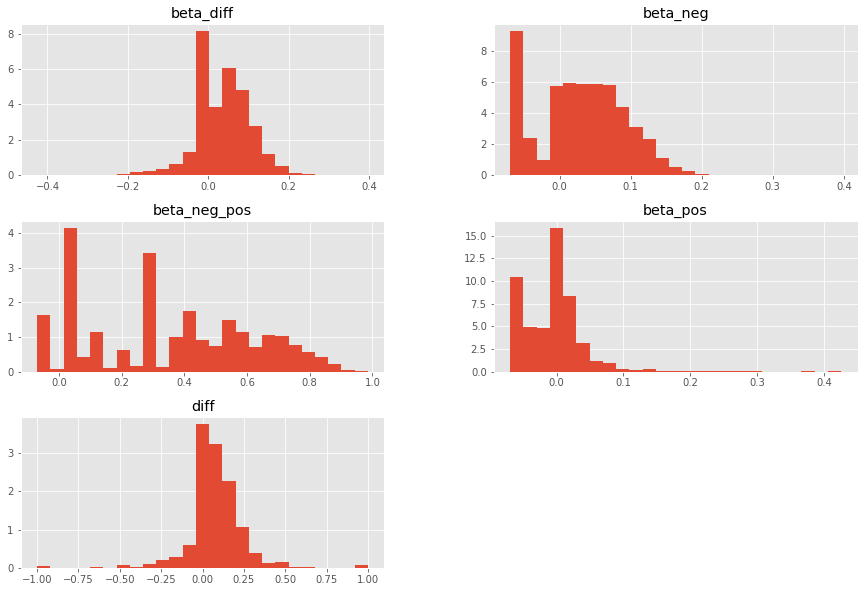

In [14]:
dff_big['month'] = dff_big.date.apply(lambda w: w[:-3])

dff_big['neg_share'] = dff_big['rusent_neg']/dff_big['rusent_cnt']
dff_big['pos_share'] = dff_big['rusent_pos']/dff_big['rusent_cnt']
dff_big['diff'] = dff_big['neg_share'] - dff_big['pos_share']
# dff_big['neg_pos_share'] = dff_big['rusent_neg']/(dff_big['rusent_pos'] + 0.001)

dff_big[['beta_neg_pos', 'beta_neg', 'beta_pos', 'diff',  'beta_diff']].hist(figsize=(15,10), density=True, bins=25);

In [15]:
dff_big.head()

,post_id,likes,reposts,comments,date,url,source,rusent_cnt,rusent_pos,rusent_neg,rusent_ano,full_text,beta_neg_pos,beta_neg,beta_pos,beta_diff,month,neg_share,pos_share,diff
3,114350,0,0,0,2019-02-02,https://www.interfax.ru/world/648847,interfax_vk_posts,2.0,1.0,0.0,1.0,минэнерго сша запрещать свой ученый участвоват...,-0.055575,-0.069521,0.070000,-0.139521,2019-02,0.000000,0.500000,-0.500000
7,114345,3,1,0,2019-02-01,https://www.interfax.ru/world/648827,interfax_vk_posts,4.0,0.0,2.0,2.0,генконсульство рф в нью-йорк подтверждать заде...,0.430479,0.108732,-0.065751,0.174483,2019-02,0.500000,0.000000,0.500000
11,114341,0,0,0,2019-02-01,https://www.interfax.ru/photo/4214,interfax_vk_posts,14.0,1.0,1.0,12.0,фотохроника февраль фотохроника февраль фото и...,0.131049,-0.007655,-0.007655,0.000000,2019-02,0.071429,0.071429,0.000000
12,114340,0,0,0,2019-02-01,https://www.interfax.ru/photo/4215,interfax_vk_posts,3.0,0.0,2.0,1.0,хороший фото неделя хороший фото неделя фото и...,0.430479,0.139882,-0.069444,0.209325,2019-02,0.666667,0.000000,0.666667
13,114339,8,1,0,2019-02-01,https://www.interfax.ru/russia/648750,interfax_vk_posts,19.0,0.0,3.0,16.0,в дело арашуков появляться седьмой подозреваем...,0.530556,0.043683,-0.027296,0.070979,2019-02,0.157895,0.000000,0.157895


# Index by token (rofls)

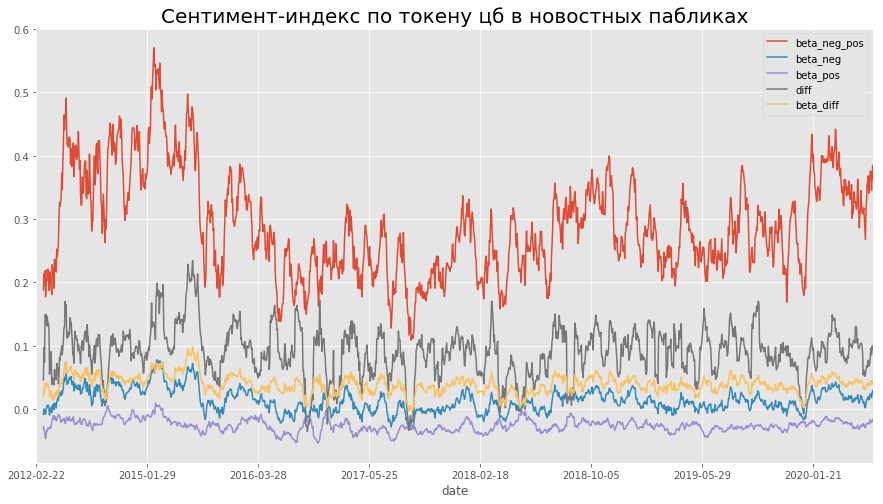

In [16]:
tok = 'цб'
# tok = 'путин'

col = ['beta_neg_pos', 'beta_neg', 'beta_pos', 'diff', 'beta_diff']

df_token = dff_big[dff_big.full_text.apply(lambda w: tok in w)]

df_token.groupby('date')[col].mean().sort_index().rolling(window=14).mean().plot(figsize=(15,8));
plt.title('Сентимент-индекс по токену {} в новостных пабликах'.format(tok), fontsize=20);

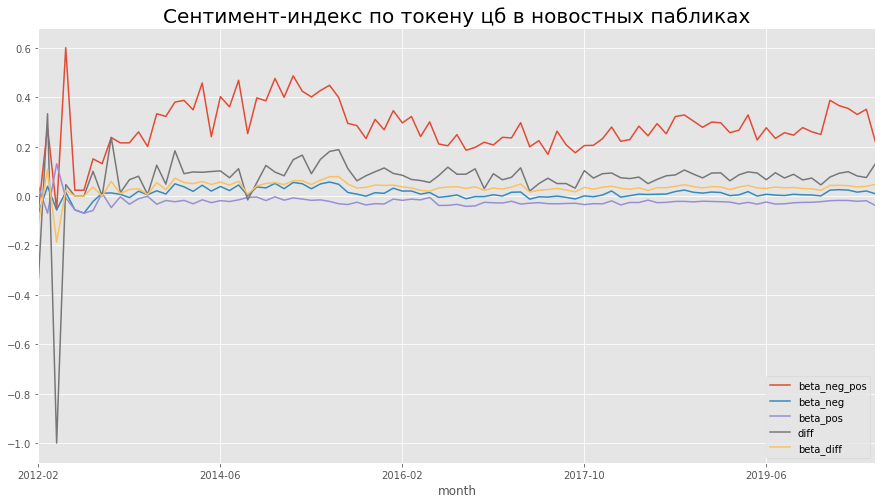

In [17]:
tok = 'цб'
# tok = 'путин'

col = ['beta_neg_pos', 'beta_neg', 'beta_pos', 'diff', 'beta_diff']

df_token = dff_big[dff_big.full_text.apply(lambda w: tok in w)]

df_token.groupby('month')[col].mean().sort_index().plot(figsize=(15,8));
plt.title('Сентимент-индекс по токену {} в новостных пабликах'.format(tok), fontsize=20);

# Index by descriptors

In [18]:
krizis = ['банк', 'курс', 'доллар', 'евро', 'цб', 'ртс', 'ммвб',  'ипотека', 'акция',
          'кредит', 'пиф', 'банкротство', 'залог', 'дефолт', 'девальвация','финансовый', 'кризис']

In [19]:
for tok in krizis:
    f = lambda w: int(tok in w.lower().split(' '))
    print(tok, dff_big.full_text.apply(f).sum())

банк 9094
курс 4390
доллар 7315
евро 3602
цб 4017
ртс 0
ммвб 51
ипотека 1340
акция 9249
кредит 2731
пиф 26
банкротство 723
залог 477
дефолт 314
девальвация 209
финансовый 3317
кризис 3420


In [20]:
m = np.zeros(dff_big.shape[0])

for tok in krizis:
    f = lambda w: int(tok in w.lower().split(' '))
    m = m + dff_big.full_text.apply(f).to_numpy()
    print(sum(m > 0))

9094
13313
18885
20918
23093
23093
23136
24165
32923
34504
34523
35088
35432
35662
35811
38223
41104


In [21]:
df_cur = dff_big[m > 0]
df_cur.shape

(41104, 20)

## Monthly

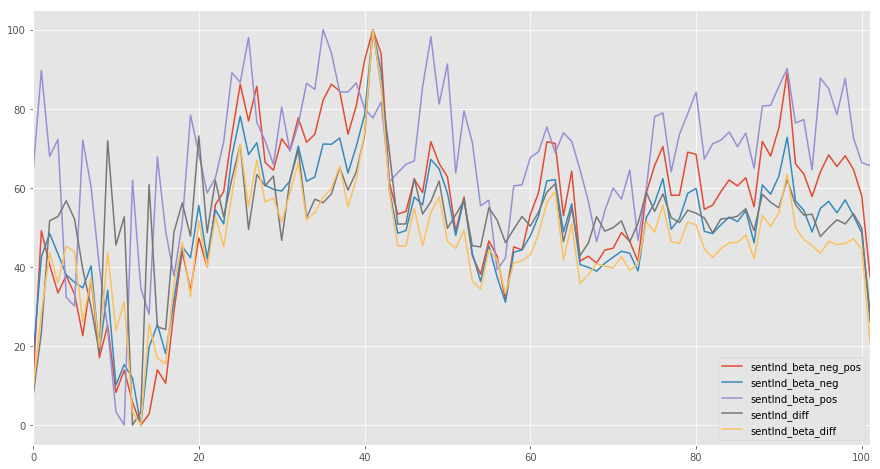

In [22]:
col = ['beta_neg_pos', 'beta_neg', 'beta_pos', 'diff', 'beta_diff']

# col = ['beta_neg_pos', 'diff', 'beta_diff']       
df_index = df_cur.groupby('month')[col].mean().sort_index()

df_index.reset_index(inplace=True)
df_index.columns = ['fielddate', 'sentInd_beta_neg_pos', 'sentInd_beta_neg', 
                    'sentInd_beta_pos', 'sentInd_diff', 'sentInd_beta_diff']

def min_max_scaler(df, col):
    mx = df[col].max()
    mn = df[col].min()
    df[col] = 100*(df[col] - mn)/(mx - mn)
    pass

for col in df_index.columns[1:]:
    min_max_scaler(df_index, col)
    
df_index.plot(figsize=(15,8));

In [23]:
df_index.to_csv('../Индексы/data_simple_index_v2/sentiment_krizis_index_month.tsv', sep="\t", index=None)

## Dayly

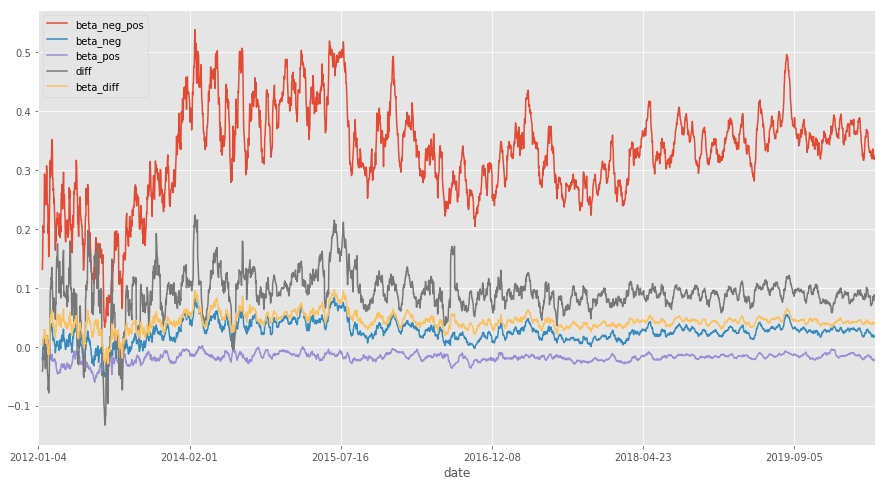

In [24]:
col = ['beta_neg_pos', 'beta_neg', 'beta_pos', 'diff', 'beta_diff']
# col = ['beta_neg_pos', 'diff', 'beta_diff']       

df_agg = df_cur.groupby('date')[col].mean().sort_index()
df_index = df_agg.rolling(window=14).mean()
df_index.plot(figsize=(15,8));

In [25]:
df_agg.reset_index(inplace=True)
df_agg.columns = ['fielddate', 'sentInd_beta_neg_pos', 'sentInd_beta_neg', 
                    'sentInd_beta_pos', 'sentInd_diff', 'sentInd_beta_diff']

for col in df_agg.columns[1:]:
    min_max_scaler(df_agg, col)

df_agg.to_csv('../Индексы/data_simple_index_v2/sentiment_krizis_index_day.tsv', sep="\t", index=None)

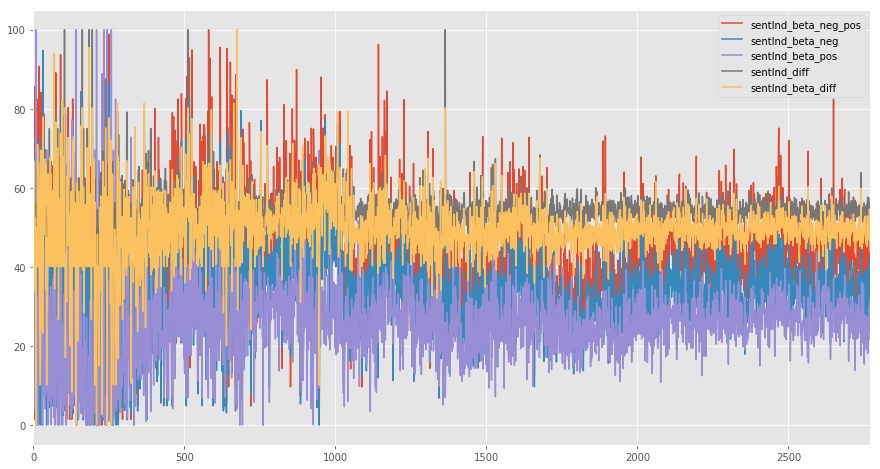

In [26]:
df_agg.plot(figsize=(15,8));

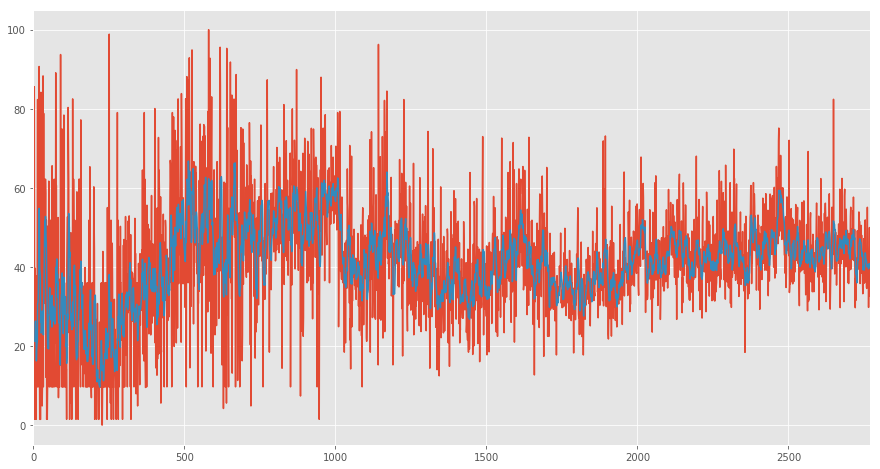

In [27]:
col = 'sentInd_beta_neg_pos'
df_agg[col].sort_index().plot(figsize=(15,8))
df_agg[col].sort_index().rolling(window=7).mean().plot(figsize=(15,8))

------------------------